In [1]:
# import necessary packages
import openeo

# connect with the backend
eoconn = openeo.connect(
        "openeo.dataspace.copernicus.eu"
        ).authenticate_oidc()

Authenticated using refresh token.


In [ ]:
# Setup process parameters
spat_ext = {
    "coordinates": [
        [
            [
                5.179169745059369,
                51.24984286550534
            ],
            [
                5.170016107999743,
                51.25052999567865
            ],
            [
                5.171081610725707,
                51.24861004739975
            ],
            [
                5.178604705735125,
                51.246720335821465
            ],
            [
                5.179169745059369,
                51.24984286550534
            ]
        ]
    ],
    "type": "Polygon"
}
temp_ext = [f"2022-05-01", f"2022-09-30"]


# Create a processing graph from the Phenology process using an active openEO connection
phenology = eoconn.datacube_from_process(
      "phenology",
       namespace="https://openeo.dataspace.copernicus.eu/openeo/1.2/processes/u:3e24e251-2e9a-438f-90a9-d4500e576574/phenology",
       spatial_extent=spat_ext,
        temporal_extent=temp_ext,
       )

In [3]:
phenology_job = phenology.create_job(title="Phenology Detection")
phenology_job.start_and_wait()

0:00:00 Job 'j-2511251320274e71872c8a2f63263bed': send 'start'
0:00:13 Job 'j-2511251320274e71872c8a2f63263bed': created (progress 0%)
0:00:18 Job 'j-2511251320274e71872c8a2f63263bed': created (progress 0%)
0:00:25 Job 'j-2511251320274e71872c8a2f63263bed': created (progress 0%)
0:00:33 Job 'j-2511251320274e71872c8a2f63263bed': created (progress 0%)
0:00:43 Job 'j-2511251320274e71872c8a2f63263bed': created (progress 0%)
0:00:55 Job 'j-2511251320274e71872c8a2f63263bed': running (progress N/A)
0:01:10 Job 'j-2511251320274e71872c8a2f63263bed': running (progress N/A)
0:01:30 Job 'j-2511251320274e71872c8a2f63263bed': running (progress N/A)
0:01:54 Job 'j-2511251320274e71872c8a2f63263bed': running (progress N/A)
0:02:24 Job 'j-2511251320274e71872c8a2f63263bed': running (progress N/A)
0:03:01 Job 'j-2511251320274e71872c8a2f63263bed': running (progress N/A)
0:03:48 Job 'j-2511251320274e71872c8a2f63263bed': running (progress N/A)
0:04:46 Job 'j-2511251320274e71872c8a2f63263bed': running (progres

<BatchJob job_id='j-2511251320274e71872c8a2f63263bed'>

In [4]:
results = phenology_job.get_results()
results.download_files("output/phenology/")

[PosixPath('output/phenology/openEO_2022-05-02Z.tif'),
 PosixPath('output/phenology/job-results.json')]

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


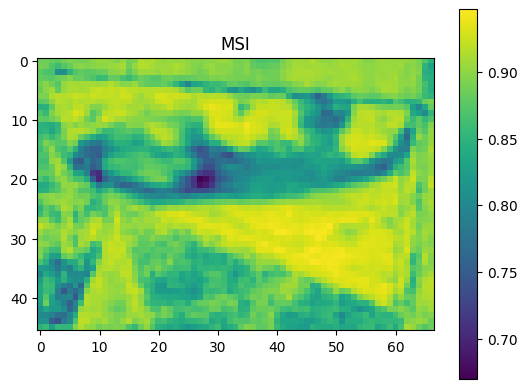

In [6]:
#plot

import rasterio
import matplotlib.pyplot as plt

img = rasterio.open("output/phenology/openEO_2022-05-02Z.tif")
# plot the first band
plt.imshow(img.read(1))
plt.colorbar()
plt.title("MSI")
plt.show()